In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red">ch10. N차원 배열(Numpy 배열) 다루기</font></b>
# 4절 복사와 뷰
## 4.1 할당

In [2]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
b = a

In [5]:
a.shape, a.ndim, id(a), type(a)

((12,), 1, 1341755221040, numpy.ndarray)

In [6]:
b.shape, b.ndim, id(b), type(b)

((12,), 1, 1341755221040, numpy.ndarray)

In [7]:
a is b

True

In [8]:
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [10]:
np.all(a==b)

True

In [11]:
b.shape = (3,4) # 할당받은 b의 shape을 수정

In [12]:
a.shape, a.ndim, id(a), type(a)

((3, 4), 2, 1341755221040, numpy.ndarray)

In [13]:
b.shape, b.ndim, id(b), type(b)

((3, 4), 2, 1341755221040, numpy.ndarray)

In [14]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## 4.2 얕은복사 : 뷰(View)

In [17]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
c = a.view() # 얕은 복사
print(id(a), id(c))

1341755222768 1341755220560


In [20]:
c==a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [21]:
c.shape = (2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [22]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
c[1, ::2] = -99 # 1행의 짝수번째 열 변경(9)
c

array([[  0,   1,   2,   3,   4,   5],
       [-99,   7, -99,   9, -99,  11]])

In [28]:
a

array([[  0,   1,   2,   3],
       [  4,   5, -99,   7],
       [-99,   9, -99,  11]])

## 4.3 깊은 복사

In [39]:
a = np.array([[5,  4, 13, 0],
              [99, 6, 16, 1],
              [20, 5, 14, 0]])
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

In [40]:
# X = a[:, :-1]    # 슬라이싱이 될 때, 뷰가 반환됨(얕은복사)
X = a[:, :-1].copy() # 깊은 복사
X = np.array(a[:,:-1], copy=True) #깊은 복사
X

array([[ 5,  4, 13],
       [99,  6, 16],
       [20,  5, 14]])

In [41]:
X[:, 0] = -9
X

array([[-9,  4, 13],
       [-9,  6, 16],
       [-9,  5, 14]])

In [42]:
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

# 5절 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [5]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [10]:
a[ [0,5,9] ]

array([ 0, 25, 81])

In [11]:
# 인덱싱하기 위한 값을 배열로 만듦
i = np.array([0, 1, 1,9])
a[i] # 결과는 i(인덱싱 배열)의 형태로 따라 감

array([ 0,  1,  1, 81])

In [13]:
i = np.array([[0,1],
              [1, 9]])
a[i]

array([[ 0,  1],
       [ 1, 81]])

In [14]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [15]:
a[i] += 10 # 1번 인덱스는 한번만 10 증가
a

array([ 20,  20,   4,   9,  16,  25,  36,  49,  64,  20, 100, 121])

In [16]:
# 색상               R G B 
palette = np.array([[0,0,0], # black
                    [255, 0, 0], # red
                    [0, 255, 0], # green
                    [0, 0, 255], # blue
                    [255,255,255]]) # white

In [21]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data.shape

(10, 10, 3)

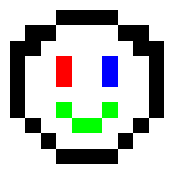

In [25]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.axis('off')
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [26]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [28]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [30]:
a[a%2==0] # 논리 배열을 이용한 인덱싱시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [31]:
a[a>15]

array([16, 17, 18, 19])

# 6절 선형대수
- 2차원 넘파이 배열을 행렬
    * 행렬곱 : @
    * 단위행렬 : np.eye(n) : n행n열 단위행렬
    * 전치행렬 : X.T, X.transpose() 
    * 역행렬 : np.linalg.inv(X)

In [32]:
a = np.array([[1,2],
              [3,4]])
a

array([[1, 2],
       [3, 4]])

In [33]:
# a의 역행렬 : a의 역행렬 @ a = 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [34]:
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [40]:
# 정방행렬이 아니면 역행렬을 구할 수 없음
a = np.array([[1,2,1],
              [3,4,1]])
# np.linalg.inv(a) 에러
a.T@a

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [38]:
# 전치행렬을 곱하면 정방행렬로 
a @ a.T

array([[ 6, 12],
       [12, 26]])

## 6.1 선형 연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터2

In [7]:
import numpy as np
x = np.array([2, 4]) # 공부량 : 독립변수
y = np.array([40, 60]) # 점수 : 종속변수(타겟변수)
X = np.c_[x, np.ones(len(x)) ]
X = np.column_stack( (x, np.ones(len(x))) )
X = np.dstack( (x, np.ones(len(x)))).reshape(-1, 2) # dstack은 3차원이라서 2차원변경
Y = y.reshape(-1, 1)
X, Y

(array([[2., 1.],
        [4., 1.]]),
 array([[40],
        [60]]))

In [8]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y
wb = np.linalg.inv(X) @ Y
wb

array([[10.],
       [20.]])

In [9]:
x_ = np.linspace(0, 10, 100) # 0부터 10까지 100개 데이터
h = wb[0]*x_ + wb[1]
h = np.add(np.multiply(wb[0], x_), wb[1])

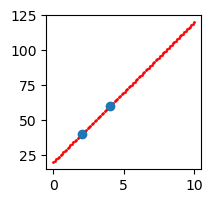

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))

plt.scatter(x_ , h , c= 'r' ,s=1)
plt.scatter(x,y)

plt.show()

## 6.2 선형연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터n개

In [13]:
x=np.array([32, 64, 96,118,126,144,152.5, 158])
x=np.array([18,24,61.5,49,52,105,130.3,125])

In [16]:
X=np.c_[x,np.ones(len(x))]
Y=y.reshape(-1,1)

X,Y

(array([[ 18. ,   1. ],
        [ 24. ,   1. ],
        [ 61.5,   1. ],
        [ 49. ,   1. ],
        [ 52. ,   1. ],
        [105. ,   1. ],
        [130.3,   1. ],
        [125. ,   1. ]]),
 array([[40],
        [60]]))

In [19]:
# X @ wb=Y
# X,T @ X @ wb =X.T @ Y
# X.T @ X:
# (X.T @ X)의 역행렬  @ X.T @  X @ wb=(X.T @ X)의 역행렬 @ X.T @ Y


# wb=(X.T @ X)의 역행렬  @ X.T @ Y
wb = np.linalg.inv(X.T@X)@X.T@Y
wb

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 8)

In [ ]:
print('독립변수 x:',x)
print('실제값 y:', y)
h=wb[0]*x+wb[1]
print('예측값 h', h)

# 7절 연습문제
## 실습형

In [20]:
from sklearn import datasets
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
import seaborn as sns
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data # 독립변수
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [24]:
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data # 독립변수 4개, 데이터 갯수는 150행
iris_data.shape

(150, 4)

In [29]:
# 실습형  1. 각 변수별 평균(열별 평균)
np.mean(iris_data,axis=0)
iris_data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [30]:
# 실습형 2. 처음 다섯개 행 출력
iris_data[:5] #iris)data[:5], iris_data[:5,:], iris_data[:5,...]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [31]:
# 실습형 3, 처음 5개 행에서 마지막 열을 제외한 나머지 열을 출력하세요
ex
array([[5.1, 3.5, 1.4],
       [4.9, 3.0, 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5.0, 3.6, 1.4]])

In [37]:
# 실습형 4. 처음 다섯개 행에서 마지막 열만 출력
ex4 = np.hsplit(iris_data[:5], [-1])[-1] # 메일 받은 내용 (2차원)
ex4 = iris_data[:5,-1] # iris_data[:5,-1:]과 다름
ex4 # 1차원

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [39]:
# 실습형 5. ex3과 ex4을 원래 모양이 되도록 합치기
answer1 = np.c_[ex3, ex4]
answer2 = np.column_stack((ex3, ex4))
answer3 = np.hstack((ex3, ex4[:, np.newaxis]))
answer4 = np.hstack( (ex3, ex4.reshape(-1,1)))
answer5 = np.hstack( (ex3, np.expand_dims(ex4, axis=1)))
answer6 = np.concatenate( (ex3, ex4.reshape(-1, 1)), axis=1)
np.all(answer1==answer2) # 모든 행, 모든 열이 같은지 여부
answers = [answer1, answer2, answer3, answer4, answer5, answer6]
all([np.all(answer1==answer) for answer in answers])

NameError: name 'ex3' is not defined

In [40]:
def same_all(*answers):
    if len(answers)>0:
        first = answers[0]
        return all([np.all(first==answer) for answer in answers])
    else:
        return False
same_all(answer1, answer2, answer3, answer4, answer5, answer6)

NameError: name 'answer1' is not defined

In [ ]:
same_all(*answers)

In [41]:
# 실습형 6. 처음 다섯개행을 이용해서 각 열별로 평균보다 큰값 출력
# 메일받은 내용
a = iris_data[:5]
b = a.mean(axis=0)
a, b

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([4.86, 3.28, 1.4 , 0.2 ]))

In [42]:
# 메일받은 내용
A = np.array(a[..., 0])
B = np.array(a[..., 1])
C = np.array(a[..., 2])
D = np.array(a[..., 3])
E = np.concatenate((A[A>np.mean(A)],
             B[B>np.mean(B)],
             C[C>np.mean(C)],
             D[D>np.mean(D)]),axis=-1)
E

array([5.1, 4.9, 5. , 3.5, 3.6, 1.5])

In [43]:
# 메일받은 내용
a = iris_data[:5]
b = a.mean(axis=0)

print([data for data in a[:,0] if data>b[0]])
print([data for data in a[:,1] if data>b[1]])
print([data for data in a[:,2] if data>b[2]])
print([data for data in a[:,3] if data>b[3]])

[5.1, 4.9, 5.0]
[3.5, 3.6]
[1.5]
[]


In [44]:
a = iris_data[:5]
b = a.mean(axis=0)
a, b

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([4.86, 3.28, 1.4 , 0.2 ]))

In [45]:
# 메일받은 내용
for i in range(a.shape[1]):
    col = a[:,i].copy()
    result = col[col>b[i]]
    print(f'{i}번째 열 : {result}')

0번째 열 : [5.1 4.9 5. ]
1번째 열 : [3.5 3.6]
2번째 열 : [1.5]
3번째 열 : []


In [46]:
# 강사 풀이
iris_sample = iris_data[:5]
print('데이터 :\n',iris_sample)
col_avg = np.mean(iris_sample, axis=0)
print('iris_sample의 열별 평균 :', col_avg)

데이터 :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
iris_sample의 열별 평균 : [4.86 3.28 1.4  0.2 ]


In [47]:
iris_sample > col_avg

array([[ True,  True, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [48]:
iris_sample[iris_sample>col_avg]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [49]:
x = iris_sample.copy() # 깊은 복사
x[x <= col_avg] = np.nan # 출력을 안했으면 하는 부분에 결측치
x

array([[5.1, 3.5, nan, nan],
       [4.9, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, 1.5, nan],
       [5. , 3.6, nan, nan]])

In [50]:
# 메일받은 내용
np.where(iris_sample>col_avg, iris_sample, np.nan)

array([[5.1, 3.5, nan, nan],
       [4.9, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, 1.5, nan],
       [5. , 3.6, nan, nan]])

# 문제 풀이형

In [52]:
# 문제 풀이형 1
# 문제풀이형1. (3)
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [53]:
print(a.sum(0), a.sum(axis=0)) # 열을 고정하고, 행들끼리 합 (열별합)

[12 15 18 21] [12 15 18 21]


In [54]:
# 문제풀이형2. (3)
#       나머지는 차원이 바뀐 값을 return하여 출력될 뿐 a가 바뀌지 않는다
import numpy as np
a = np.floor(10*np.random.random((3,4)))
a

array([[3., 1., 0., 8.],
       [7., 6., 3., 5.],
       [6., 6., 6., 3.]])

In [55]:
a.shape

(3, 4)

In [56]:
print(a.ravel()) # (1) 차원 배열로 평평하게 펴주는 ravel() flatten() a가 바뀌지 않음
a

[3. 1. 0. 8. 7. 6. 3. 5. 6. 6. 6. 3.]


array([[3., 1., 0., 8.],
       [7., 6., 3., 5.],
       [6., 6., 6., 3.]])

In [57]:
print(a.reshape(6,2))
a # (2) 바뀐차원을 return할 뿐 a가 바뀌지 않음

[[3. 1.]
 [0. 8.]
 [7. 6.]
 [3. 5.]
 [6. 6.]
 [6. 3.]]


array([[3., 1., 0., 8.],
       [7., 6., 3., 5.],
       [6., 6., 6., 3.]])

In [58]:
a.resize((2,6))
a

array([[3., 1., 0., 8., 7., 6.],
       [3., 5., 6., 6., 6., 3.]])

In [59]:
print(a.T)
a

[[3. 3.]
 [1. 5.]
 [0. 6.]
 [8. 6.]
 [7. 6.]
 [6. 3.]]


array([[3., 1., 0., 8., 7., 6.],
       [3., 5., 6., 6., 6., 3.]])

In [60]:
# 문제풀이형3. (1)
import numpy as np
a = np.arange(12).reshape(3,4)
print(a)
a[:2]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [61]:
# 문제풀이형 4. (2)
import numpy as np
a = np.array([1,2,3,4,5])
a[[1,3,4]] = 0
a

array([1, 0, 3, 0, 0])

In [62]:
# 문제풀이형5. (2)
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])

In [64]:
answer1 = np.c_[a,b]
answer2 = np.column_stack( [a,b] )
answer3 = np.hstack((a[:, np.newaxis], b[:, np.newaxis]))
answer4 = np.stack([a,b], axis=1)
answer5 = np.stack([a,b], axis=-1)

In [65]:
same_all(answer1, answer2, answer3, answer4, answer5)

True

In [ ]:
# 문제 풀이형 2

In [ ]:
# 문제 풀이형 3. (1)


In [ ]:
# 문제 풀이형 4. (2)